In [38]:
from legendgram import legendgram 
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt
import numpy as np
import palettable.matplotlib as mplpal
%matplotlib inline

In [39]:
gdf = gpd.read_file(ps.examples.get_path('NAT.shp'))
gdf.crs = {'init':'epsg:4269'}
gdf = gdf.to_crs(epsg=5070)

In [40]:
gdf.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,0.000000,...,0.024534,0.285235,0.372336,0.342104,0.336455,11.279621,5.4,5.663881,9.515860,"POLYGON ((49050.36572635116 2838556.384403779,..."
1,Ferry,Washington,53,019,53019,53,19,53019,0,0.000000,...,0.317712,0.256158,0.360665,0.361928,0.360640,10.053476,2.6,10.079576,11.397059,POLYGON ((-1704187.877627379 2978490.250348433...
2,Stevens,Washington,53,065,53065,53,65,53065,0,1.863863,...,0.210030,0.283999,0.394083,0.357566,0.369942,9.258437,5.6,6.812127,10.352015,"POLYGON ((-1598348.983206374 2964085.82273915,..."
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.155922,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,POLYGON ((-1713271.480862189 2979541.148423547...
4,Pend Oreille,Washington,53,051,53051,53,51,53051,0,0.000000,...,0.134605,0.243263,0.365614,0.358706,0.387848,8.243930,4.1,7.557643,10.313002,POLYGON ((-1574802.355124026 3066599.950304402...


### Using legendgrams with plots can be simple:

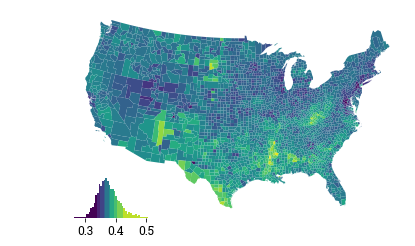

In [78]:
ax = gdf.plot("GI89")
ax.axis('off')
legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           gdf.GI89, # the attribute to map
           np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10 # the palette to use
          )

### but you can also tweak quite a bit, like the size & location:

We'll make the legend a little longer & shorter, as well as moving it to the lower right:

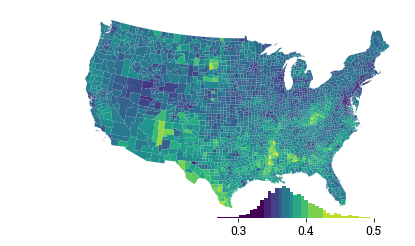

In [92]:
ax = gdf.plot("GI89")
ax.axis('off')
legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           gdf.GI89, # the attribute to map
           np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10, # the palette to use,
           legend_size=(.6,.16), # the size of the subplot, in fractions of the original axis
           loc= 'lower right' # the location on the axis
          )

We can clip the display to a smaller range to cut off any dangling long tails:

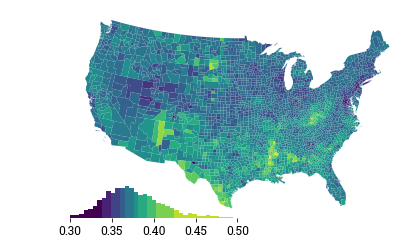

In [101]:
ax = gdf.plot("GI89")
ax.axis('off')
legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           gdf.GI89, # the attribute to map
           np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10, # the palette to use,
           legend_size=(.5,.16), # the size of the subplot, in fractions of the original axis
           loc= 'lower left', # the location on the axis
           clip=(.3,.5) # bounds to clip the view of the histogram
          )

Further, you can work directly on the axis, if you prefer very fine-grained control over the plot parameters. `legendgram` returns the axis on which the legendgram was plotted, so you can modify it after the fact:

In [166]:
riverside = gpd.GeoDataFrame(gdf.iloc[2255].to_frame().T)

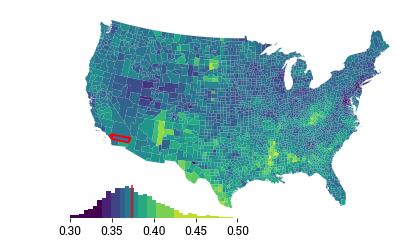

In [167]:
ax = gdf.plot("GI89") #full map
riverside.plot('GI89', linewidth=2, edgecolor='r', ax=ax) #riverside in red
ax.axis('off')
hax = legendgram(plt.gcf(), # grab the figure, we need it
           ax, # the axis to add the legend
           gdf.GI89, # the attribute to map
           np.percentile(gdf.GI89, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10, # the palette to use,
           legend_size=(.5,.16), # the size of the subplot, in fractions of the original axis
           loc= 'lower left', # the location on the axis
           clip=(.3,.5) # bounds to clip the view of the histogram
          )
hax.vlines(gdf.iloc[2255].GI89,0,1,color='r', 
           transform=hax.transAxes) #mark Riverside's Gini in the legend